This problem is from Model Building in Mathematical Programming by H.Paul Williams(5th Edition Page266)

A quantity y is known to depend on another quantity x. A set of corresponding
values has been collected for x and y and is presented in Table below.
1. Fit the ‘best’ straight line y = bx + a to this set of data points. The objective is to minimise the sum of absolute deviations of each observed value
of y from the value predicted by the linear relationship.
2. Fit the ‘best’ straight line where the objective is to minimise the maximum
deviation of all the observed values of y from the value predicted by the
linear relationship.


|   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |   |
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| **x** | 0.0 | 0.5 | 1.0 | 1.5 | 1.9 | 2.5 | 3.0 | 3.5 | 4.0 | 4.5 | 5.0 | 5.5 | 6.0 | 6.6 | 7.0 | 7.6 | 8.5 | 9.0 | 10.0 |
| **y** | 1.0 | 0.9 | 0.7 | 1.5 | 2.0 | 2.4 | 3.2 | 2.0 | 2.7 | 3.5 | 1.0 | 4.0 | 3.6 | 2.7 | 5.7 | 4.6 | 6.0 | 6.8 | 7.3 |





For problem 1, Objective function is minimize ∑(ui) +∑(vi) 
																																					                                     subject to b*xi + a + ui − vi = yi 
																																					                                                i = 1,2,3,...,19
For problem 2, Objective function is minimize ∑(ui) +∑(vi) 
																																					subject to b*xi + a + ui − vi = yi
																																					                                                z − ui ≥ 0
																																					                                                z − vi ≥ 0
																																					                                                i = 1,2,3,...,19

In [17]:
import pandas as pd 
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [39]:
# Data from table in problem definition
obs, x, y = gp.multidict({
    ('1'): [0,1],
    ('2'): [0.5,0.9],
    ('3'): [1,0.7],
    ('4'): [1.5,1.5],
    ('5'): [1.9,2],
    ('6'): [2.5,2.4],
    ('7'): [3,3.2],
    ('8'): [3.5,2],
    ('9'): [4,2.7],
    ('10'): [4.5,3.5],
    ('11'): [5,1],
    ('12'): [5.5,4],
    ('13'): [6,3.6],
    ('14'): [6.6,2.7],
    ('15'): [7,5.7],
    ('16'): [7.6,4.6],
    ('17'): [8.5,6],
    ('18'): [9,6.8],
    ('19'): [10,7.3]
})

### Model

In [55]:
model = gp.Model('CurveFitting')

In [56]:
# Variables
a = model.addVar(vtype=GRB.CONTINUOUS,lb=-GRB.INFINITY,ub=GRB.INFINITY,name='a')
b = model.addVar(vtype=GRB.CONTINUOUS,lb=-GRB.INFINITY,ub=GRB.INFINITY,name='b')
u = model.addVars(obs,vtype=GRB.CONTINUOUS,name='u')
v = model.addVars(obs,vtype=GRB.CONTINUOUS,name='v')
z = model.addVar(vtype=GRB.CONTINUOUS,name='z')

In [57]:
# Problem 1 constraint
dev = model.addConstrs((b*x[i] + a + u[i] - v[i] == y[i] for i in obs),name='devs')

In [58]:
# Objective function
model.setObjective(u.sum('*') + v.sum('*'))

In [59]:
model.optimize()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i5-10300H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 19 rows, 41 columns and 75 nonzeros
Model fingerprint: 0x0bec2f7b
Coefficient statistics:
  Matrix range     [5e-01, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 7e+00]
Presolve removed 0 rows and 1 columns
Presolve time: 0.00s
Presolved: 19 rows, 40 columns, 75 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0      handle free variables                          0s
      20    1.1466250e+01   0.000000e+00   0.000000e+00      0s

Solved in 20 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.146625000e+01


In [60]:
print(f"Best straight line to minimize sum of absolute deviations is: \n y = {b.x:.3f}x + {a.x:.3f}")

Best straight line to minimize sum of absolute deviations is: 
 y = 0.638x + 0.581


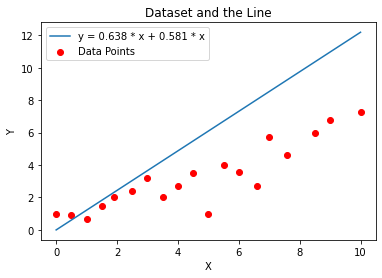

In [61]:
a_x = a.x
b_x = b.x

x_values = x.values()
y_values = y.values()

x_line = np.linspace(min(x_values), max(x_values), 100)
y_line = b_x * x_line + a_x * x_line

plt.plot(x_line, y_line, label=f'y = {b_x:.3f} * x + {a_x:.3f} * x')
plt.scatter(x_values, y_values, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset and the Line')
plt.legend()
plt.show()

##### For Problem 2 we add the max deviation constraints to the existing constraints

In [62]:
positive_dev = model.addConstrs((z >= u[i] for i in obs),name='positive_dev')
negative_dev = model.addConstrs((z >= v[i] for i in obs),name='negative_dev')

In [63]:
# New objective is to minimeze deviation(z)
model.setObjective(z)

In [64]:
model.optimize()

Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i5-10300H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 57 rows, 41 columns and 151 nonzeros
Coefficient statistics:
  Matrix range     [5e-01, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 7e+00]
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   1.146625e+01   0.000000e+00      0s
      11    1.7250000e+00   0.000000e+00   0.000000e+00      0s

Solved in 11 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.725000000e+00


In [65]:
print(f"Best straight line to minimize the maximum deviation is: \n y = {b.x:.3f}x + ({a.x:.3f})")

Best straight line to minimize the maximum deviation is: 
 y = 0.625x + (-0.400)


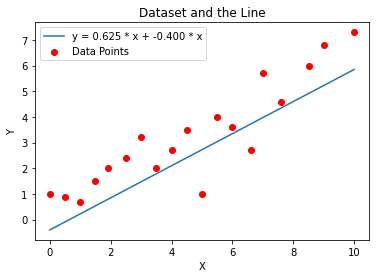

In [66]:
a_x = a.x
b_x = b.x

x_values = x.values()
y_values = y.values()

x_line = np.linspace(min(x_values), max(x_values), 100)
y_line = b_x * x_line + a_x

plt.plot(x_line, y_line, label=f'y = {b_x:.3f} * x + {a_x:.3f} * x')
plt.scatter(x_values, y_values, color='red', label='Data Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dataset and the Line')
plt.legend()
plt.show()